In [28]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
%matplotlib inline
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The GeoPandas version is {}.\n'.format(gpd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

# The Python version is 3.7.5 (default, Nov  1 2019, 02:16:32) 
# [Clang 11.0.0 (clang-1100.0.33.8)].

# The Numpy version is 1.18.2.

# The Pandas version is 1.0.3.

# The Matplotlib version is 3.2.1.

# The Scikit-Learn version is 0.22.2.post1.

The Python version is 3.7.5 (default, Nov  1 2019, 02:16:32) 
[Clang 11.0.0 (clang-1100.0.33.8)].

The Numpy version is 1.18.2.

The Pandas version is 1.0.3.

The GeoPandas version is 0.7.0.

The Matplotlib version is 3.2.1.

The Scikit-Learn version is 0.22.2.post1.



In [9]:
path = '../covid19-global-forecasting-week-1/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'submission.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              16188 non-null  int64  
 1   Province/State  7410 non-null   object 
 2   Country/Region  16188 non-null  object 
 3   Lat             16188 non-null  float64
 4   Long            16188 non-null  float64
 5   Date            16188 non-null  object 
 6   ConfirmedCases  16188 non-null  float64
 7   Fatalities      16188 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1011.9+ KB


In [11]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [32]:
group_by_country = \
train.groupby('Country/Region').agg({'Lat':'nunique',
                                     'Long':'nunique',
                                     'ConfirmedCases':'max',
                                     'Fatalities':'max'})
group_by_country

,Lat,Long,ConfirmedCases,Fatalities
Country/Region,,,,
Afghanistan,1,1,22.0,0.0
Albania,1,1,59.0,2.0
Algeria,1,1,74.0,7.0
Andorra,1,1,39.0,0.0
Antigua and Barbuda,1,1,1.0,0.0
...,...,...,...,...
Uruguay,1,1,50.0,0.0
Uzbekistan,1,1,15.0,0.0
Venezuela,1,1,36.0,0.0


In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [34]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [35]:
world_merged = world.merge(group_by_country, left_on = 'name',
                           right_on = 'Country/Region',
                           how='left')

In [36]:
type(world_merged)

geopandas.geodataframe.GeoDataFrame

In [37]:
world_merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Lat,Long,ConfirmedCases,Fatalities
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1.0,1.0,3.0,0.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",10.0,11.0,221.0,7.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN


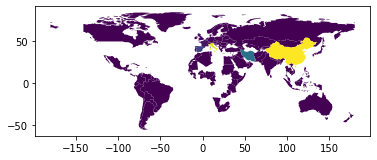

In [38]:
world_merged.plot(column='Fatalities')

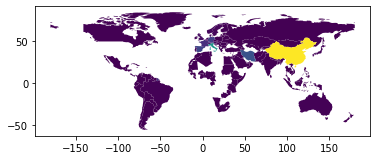

In [39]:
world_merged.plot(column='ConfirmedCases')

In [40]:
group_by_country.sort_values('Fatalities')

,Lat,Long,ConfirmedCases,Fatalities
Country/Region,,,,
Afghanistan,1,1,22.0,0.0
North Macedonia,1,1,35.0,0.0
Nigeria,1,1,8.0,0.0
New Zealand,1,1,20.0,0.0
Nepal,1,1,1.0,0.0
...,...,...,...,...
France,8,8,9043.0,148.0
Spain,1,1,13910.0,623.0
Iran,1,1,17361.0,1135.0
